In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Lets try to solve with linear regression first

In [2]:
data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr=LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
print(lr.coef_)
print(lr.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [10]:
y_pred=lr.predict(X_test)

In [11]:
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.4399338661568969
RMSE 55.627840795469155


# Now try to slove with Ridge ridge regularization

In [13]:
from sklearn.linear_model import Ridge

In [14]:
Rd=Ridge(alpha=1000)

In [15]:
Rd.fit(X_train,y_train)

Ridge(alpha=1000)

In [16]:
print(Rd.coef_)
print(Rd.intercept_)

[ 0.29572556  0.06929029  0.76900381  0.59782445  0.28289952  0.22593551
 -0.49560691  0.52703134  0.7614959   0.47102907]
150.46479454828184


In [17]:
y_pred1=Rd.predict(X_test)

In [18]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.010136670498663625
RMSE 74.70722683312947


now I want to create a data set and apply on it

<function matplotlib.pyplot.show(close=None, block=None)>

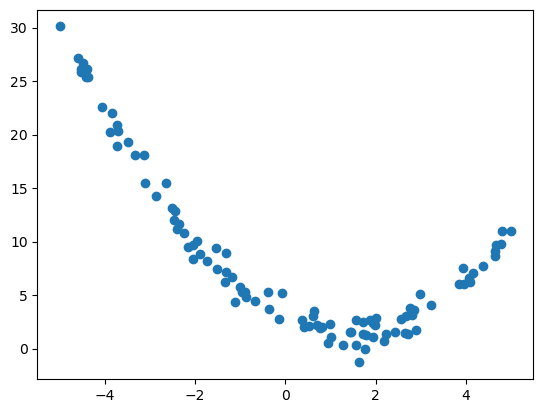

In [19]:
n=100
X1=10* np.random.rand(n,1)-5
y1= 0.7*X1**2-2*X1+3+np.random.randn(n,1)
plt.scatter(X1,y1)
plt.show


C:\Users\ranja\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.01386e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ranja\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.36421e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


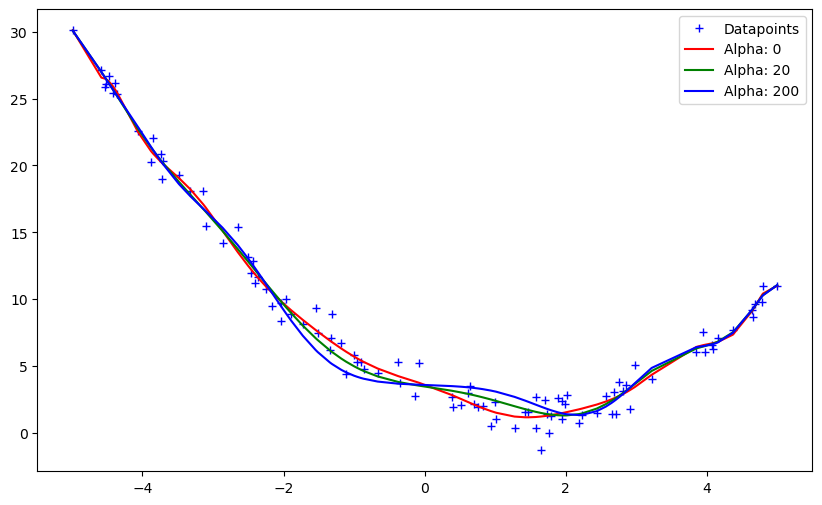

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X1, y, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X1, y1)
    return model.predict(X1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(X1, y1, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X1, y1, alpha)
    # Plot
    plt.plot(sorted(X1[:, 0]), preds[np.argsort(X1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()